<a href="https://colab.research.google.com/github/Tarun-23113/My_Python_Projects/blob/master/Plotting_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/data.csv")
df = df.dropna(subset=["MSRP", "Engine HP", "Make", "Engine Cylinders", "Transmission Type", "Driven_Wheels"])
df = df[df['MSRP']<100000]
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


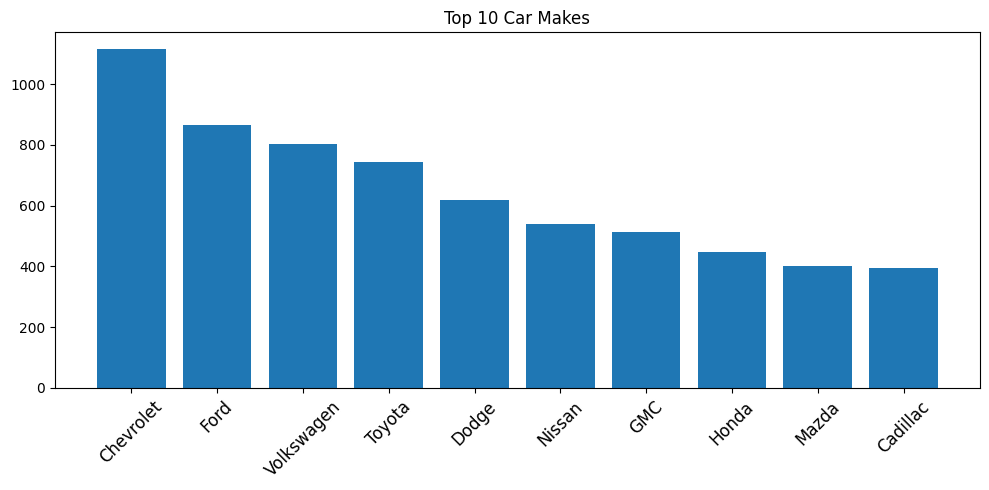

In [8]:
# import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(df['Make'].value_counts().head(10).index, df['Make'].value_counts().head(10).values)
plt.xticks(rotation=45, fontsize=12)
plt.title("Top 10 Car Makes")
plt.tight_layout()
plt.show()


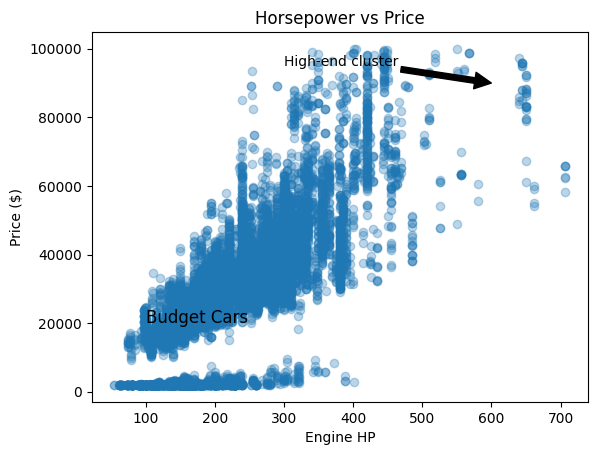

In [9]:
plt.scatter(df['Engine HP'], df['MSRP'], alpha=0.3)
plt.annotate('High-end cluster', xy=(600, 90000), xytext=(300, 95000),
             arrowprops=dict(facecolor='black'))
plt.text(100, 20000, "Budget Cars", fontsize=12)
plt.xlabel('Engine HP')
plt.ylabel('Price ($)')
plt.title("Horsepower vs Price")
plt.show()

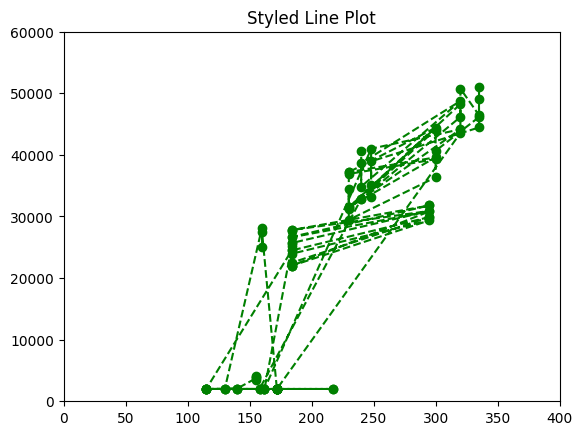

In [15]:
plt.plot(df['Engine HP'][:100], df['MSRP'][:100], color='green', linestyle='--', marker='o')
plt.xlim(0, 400)
plt.ylim(0, 60000)
plt.title("Styled Line Plot")
plt.show()

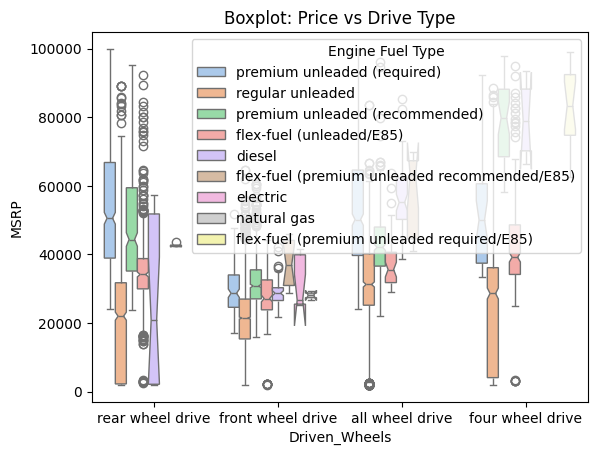

<ipython-input-31-191ccc58a57f>:5: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=3`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(x='Transmission Type', y='MSRP', data=df, hue='Engine Fuel Type', bw=3)


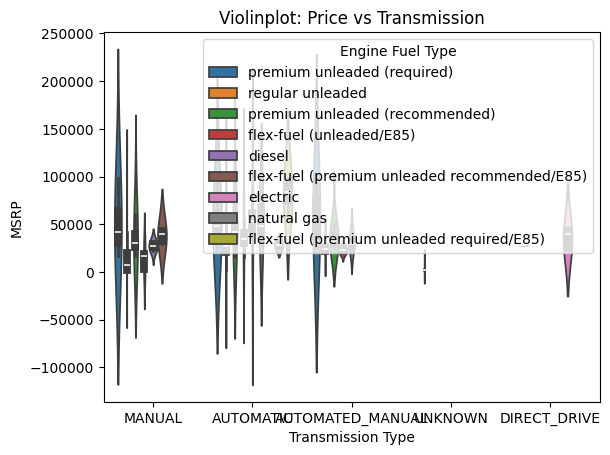

In [31]:
sns.boxplot(x='Driven_Wheels', y='MSRP', data=df,hue='Engine Fuel Type',palette='pastel', notch=True)
plt.title("Boxplot: Price vs Drive Type")
plt.show()

sns.violinplot(x='Transmission Type', y='MSRP', data=df, hue='Engine Fuel Type', bw=3)
plt.title("Violinplot: Price vs Transmission")
plt.show()

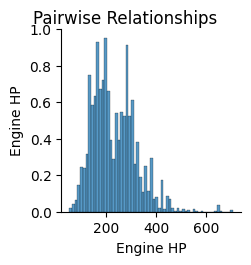

In [37]:
sns.pairplot(df[['Engine HP']])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

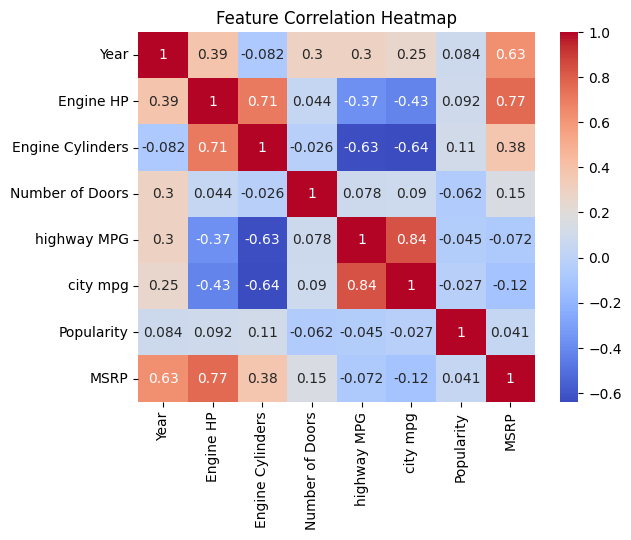

In [38]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

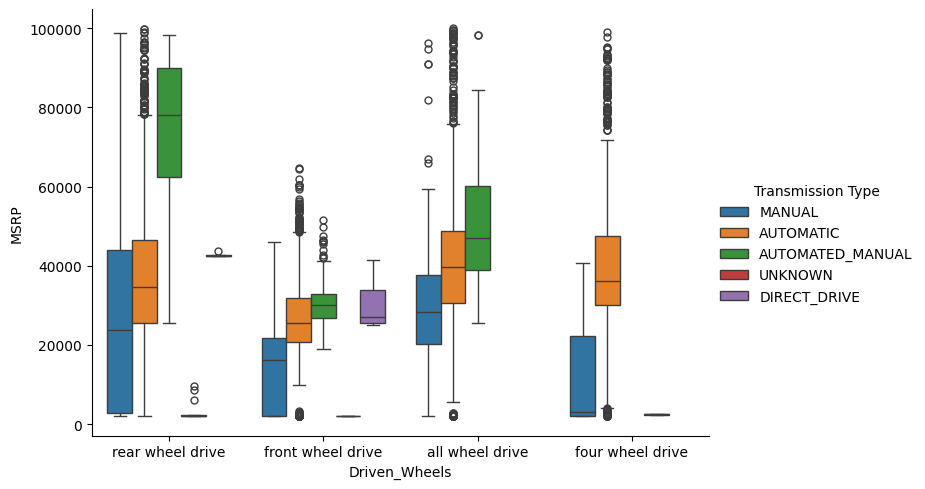

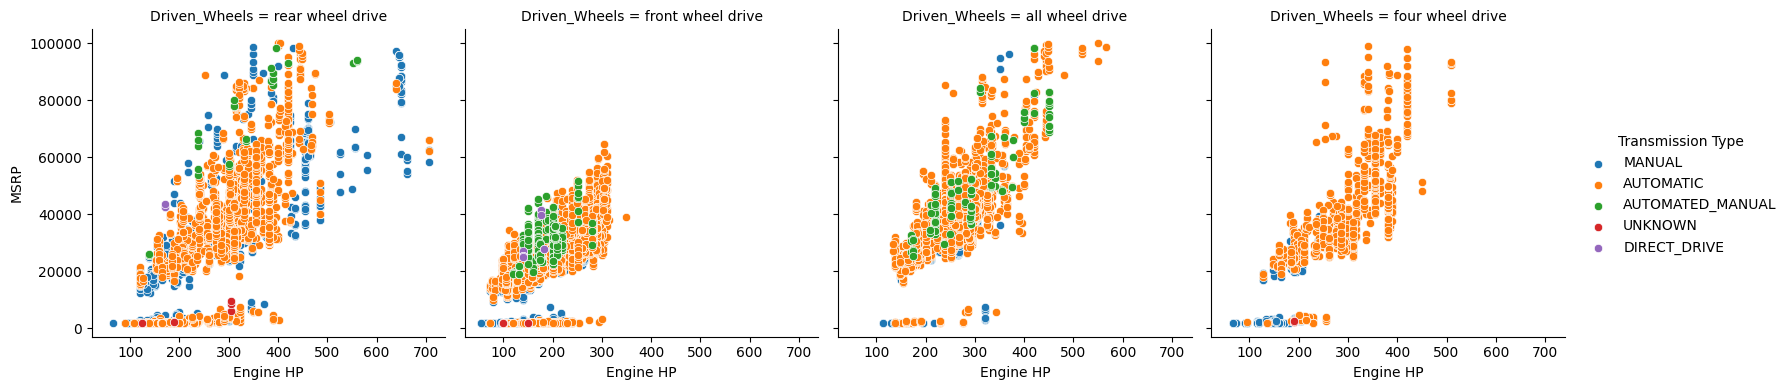

In [41]:
sns.catplot(x='Driven_Wheels', y='MSRP', hue='Transmission Type', data=df, kind='box', height=5, aspect=1.5)

g = sns.FacetGrid(df, col='Driven_Wheels', hue='Transmission Type', height=4)
g.map(sns.scatterplot, 'Engine HP', 'MSRP').add_legend()

ValueError: context must be in paper, notebook, talk, poster

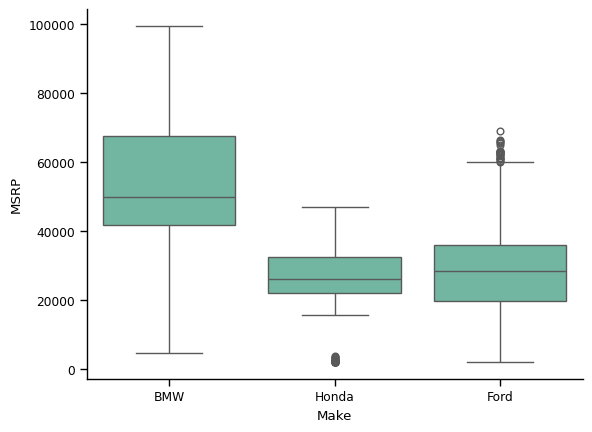

In [56]:
# bigger labels

sns.boxplot(x='Make', y='MSRP', data=df[df['Make'].isin(['BMW', 'Ford', 'Honda'])])
sns.despine()  # remove spines
sns.set_palette("Set2")
sns.set_context("pper")

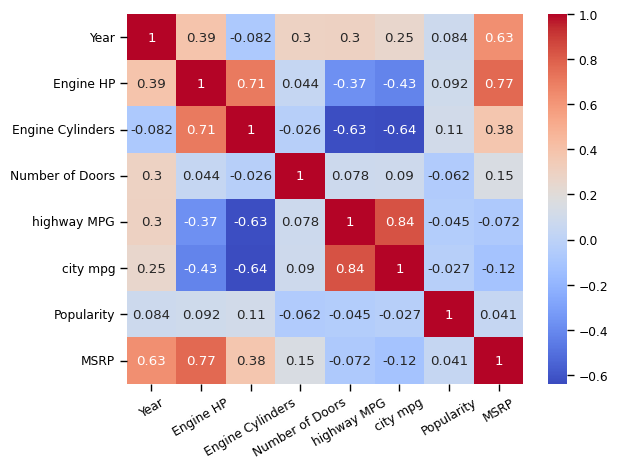

In [59]:
# Plot a heatmap of numerical features. Remove any with correlation > 0.9. Which features remain?

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.xticks(rotation=30)
plt.show()

<BarContainer object of 5 artists>

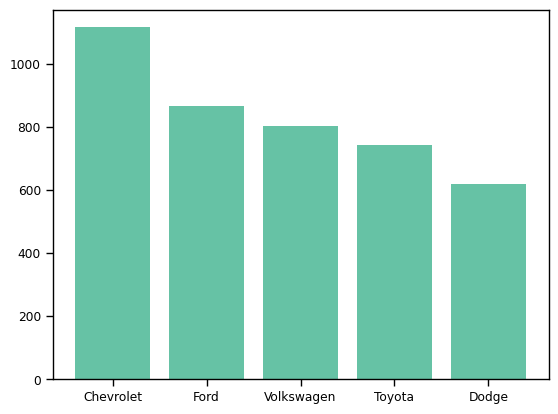

In [66]:
# Plot a bar chart of the top 5 most common car brands. Rotate x-axis labels by 45°.

x = df['Make'].value_counts().sort_values(ascending=False).reset_index().head()

plt.bar(x['Make'], x['count'])

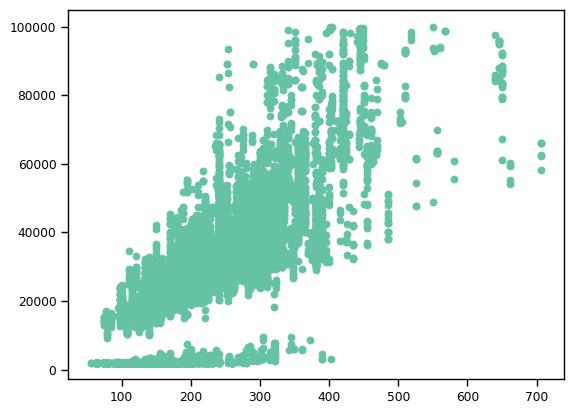

In [67]:
# Plot a scatter plot of 'Engine HP' vs 'MSRP'. Add axis labels and title.

plt.scatter(df['Engine HP'], df['MSRP'])

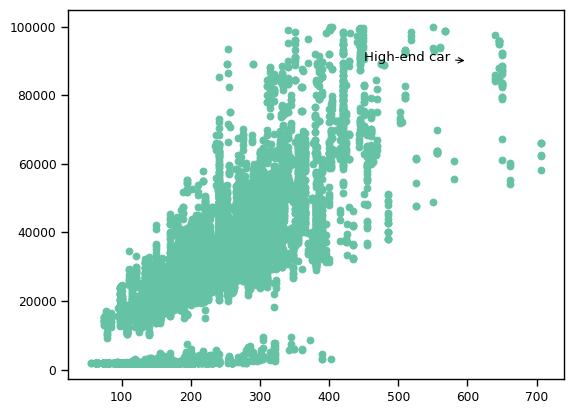

In [74]:
# In the above scatter plot, annotate the point (600 HP, $90,000) with text 'High-end car'.

plt.scatter(df['Engine HP'], df['MSRP'])
plt.annotate('High-end car', xy=(600, 90000),xytext=(450, 90000), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.show()

<Axes: xlabel='drive_type', ylabel='MSRP'>

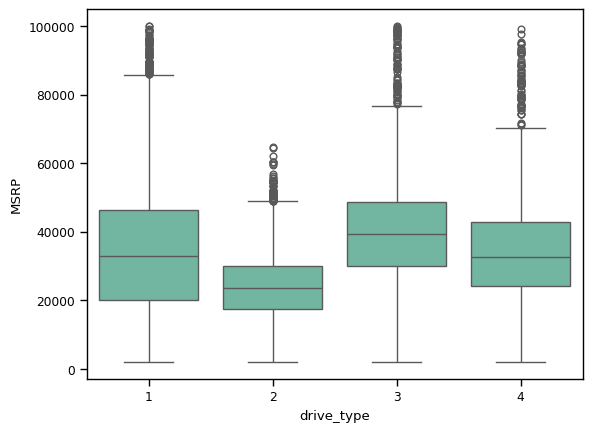

In [86]:
# Plot MSRP by Drive Wheel type. Use a title and improve readability.

drive_map = {
    'rear wheel drive':1,
    'front wheel drive':2,
    'all wheel drive':3,
    'four wheel drive':4

}
df['drive_type'] = pd.Categorical(values=df['Driven_Wheels'].map(drive_map), categories=[1, 2, 3, 4], ordered=True)
sns.boxplot(x='drive_type', y='MSRP', data=df)

<Axes: xlabel='Transmission Type', ylabel='MSRP'>

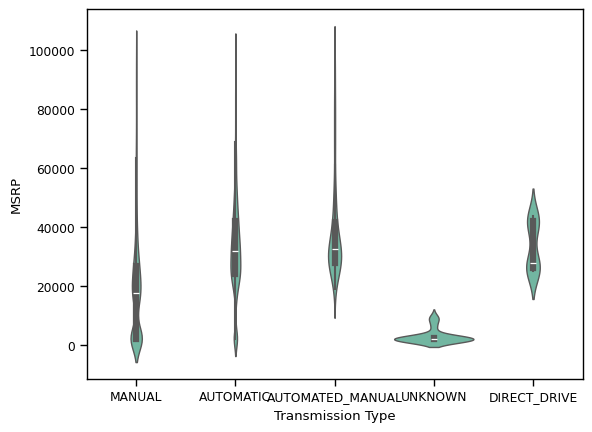

In [88]:
# Compare MSRP distribution for Automatic vs Manual cars.

sns.violinplot(data=df, x='Transmission Type', y='MSRP')

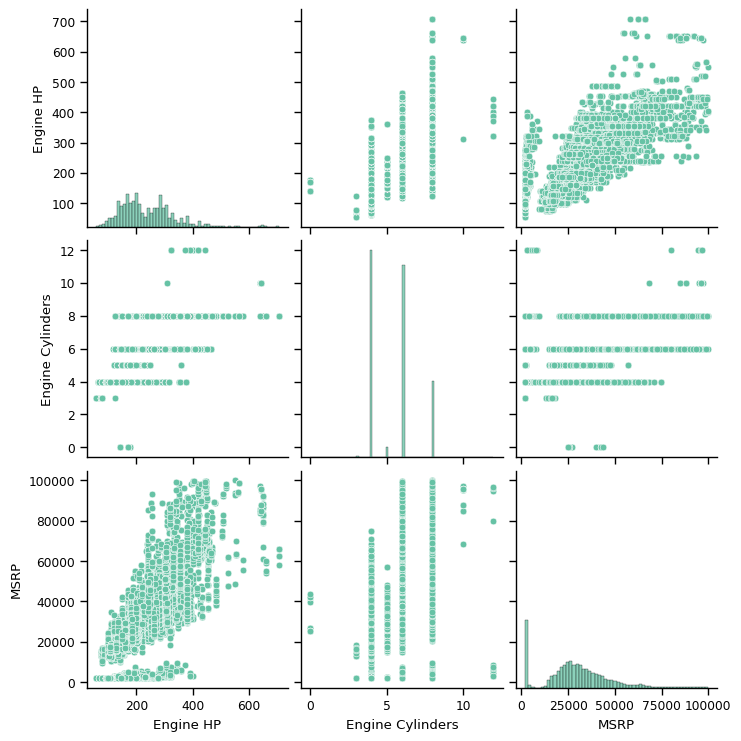

In [89]:
# Create a pairplot for 'Engine HP', 'Engine Cylinders', and 'MSRP'.

sns.pairplot(df[['Engine HP', 'Engine Cylinders', 'MSRP']])

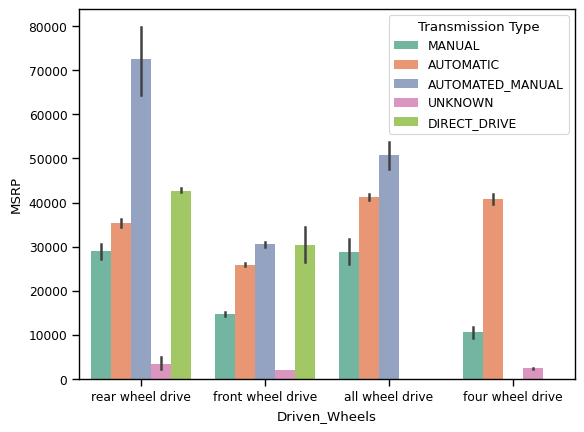

In [95]:
sns.barplot(data=df, x='Driven_Wheels', y='MSRP', hue='Transmission Type')
plt.show()